In [17]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n-pose.pt')
results = model.train(data='data.yaml', epochs=10, device=0)

In [1]:
ACUPOINT_ENCODE = {'TaiYuan': 0, "DaLing": 1, "ShenMen": 2, "YangGu": 3, "YanChi": 4, "YanShi": 5}
ACUPOINT_DECODER = {v: k for k, v in ACUPOINT_ENCODE.items()}


image 1/1 /home/robin/project/1122_CSIE/acupoint/datasets/left_back/impainted/3132-0.jpg: 640x384 1 YanGu, 1 YangChi, 1 YangShi, 71.8ms
Speed: 2.1ms preprocess, 71.8ms inference, 268.7ms postprocess per image at shape (1, 3, 640, 384)
147.15942 915.5104
226.94904 1112.2241
121.690315 889.8357


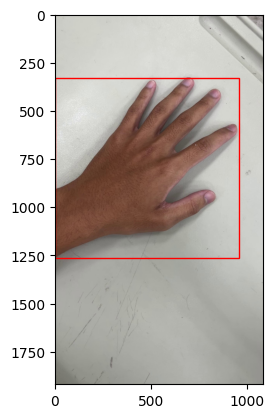

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
import cv2

# 加載訓練好的模型
model = YOLO('runs/pose/train/weights/best.pt')

# 進行預測
results = model.predict('datasets/left_back/impainted/3132-0.jpg')

# 獲取圖像
image_path = 'datasets/left_back/impainted/3132-0.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 獲取 bounding boxes 和 keypoints
cls = results[0].boxes.cls.cpu().numpy()
keypoints = results[0].keypoints.xy.cpu().numpy()
bbox = results[0].boxes.xyxy.cpu().numpy()


# 創建 Matplotlib figure 和 axis
fig, ax = plt.subplots(1)
ax.imshow(image)

# 繪製 bounding boxes 和 keypoints
x1, y1, x2, y2 = bbox[0]
rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

for c, k in zip(cls, keypoints):
    print(k[0][0], k[0][1])
    ax.plot(k[0][0], k[0][1], 'blue')


plt.show()